# CNN on Fashion MNIST Dataset

[Dataset on kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## Contents
* Data Cleaning
* Data Preprocessing
* Modeling
* Evaluation


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
sns.set(font_scale=1.3)

Loading the dataset

In [17]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [18]:
data_train.shape

(60000, 785)

In [19]:
data_train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


### Data Cleaning

In [29]:
X_train = data_train.drop(['label'], axis=1).values.reshape((60000, 28, 28, 1))
y_train = data_train['label'].values.reshape((60000, 1))
del data_train

In [30]:
X_test = data_test.drop(['label'], axis=1).values.reshape((10000, 28, 28, 1))
y_test = data_test['label'].values.reshape((10000, 1))
del data_test

Sample

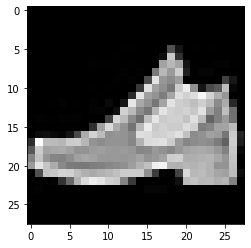

In [31]:
plt.imshow(X_train[1].reshape(28, 28), cmap='gray')
plt.show()

### Data Preprocessing
* Scaling
* Encoding

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

---
### Modeling
First layer: Convolution layer with zero padding and relu activation function

Second layer: Batch normalization

Third layer: 0.2 dropout

Fourth layer: Max pooling

Add those four layers again followed by a flatten layer

After that, add a dense layer with 128 units and a dropout layer

For output layer add a dense layer with 10 units

In [41]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    MaxPool2D(pool_size=2),
    
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [43]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
es = EarlyStopping(monitor='val_loss', patience=2)

In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=300, callbacks=[es])

Epoch 1/10
200/200 [==============================] - 88s 439ms/step - loss: 0.5719 - accuracy: 0.8017 - val_loss: 6.8297 - val_accuracy: 0.1171
Epoch 2/10
200/200 [==============================] - 94s 472ms/step - loss: 0.3508 - accuracy: 0.8729 - val_loss: 3.0601 - val_accuracy: 0.4352
Epoch 3/10
200/200 [==============================] - 90s 450ms/step - loss: 0.2988 - accuracy: 0.8912 - val_loss: 0.3212 - val_accuracy: 0.8899
Epoch 4/10
200/200 [==============================] - 96s 482ms/step - loss: 0.2669 - accuracy: 0.9019 - val_loss: 0.3481 - val_accuracy: 0.8779
Epoch 5/10
200/200 [==============================] - 99s 495ms/step - loss: 0.2492 - accuracy: 0.9083 - val_loss: 0.2415 - val_accuracy: 0.9109
Epoch 6/10
200/200 [==============================] - 92s 459ms/step - loss: 0.2312 - accuracy: 0.9151 - val_loss: 0.2474 - val_accuracy: 0.9146
Epoch 7/10
200/200 [==============================] - 96s 481ms/step - loss: 0.2182 - accuracy: 0.9179 - val_loss: 0.2649 - val_ac

### Evaluation
* Accuracy plot
* Classification report
* Confusion matrix

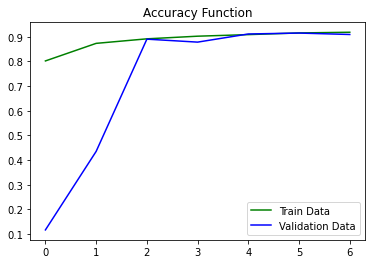

In [49]:
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')
plt.title('Accuracy Function')
plt.legend()
plt.show()

In [58]:
predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)
y_new = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 9ms/step


In [63]:
print(classification_report(y_new, classes_x))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.76      0.94      0.84      1000
           3       0.91      0.94      0.92      1000
           4       0.95      0.73      0.82      1000
           5       1.00      0.96      0.98      1000
           6       0.82      0.70      0.76      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



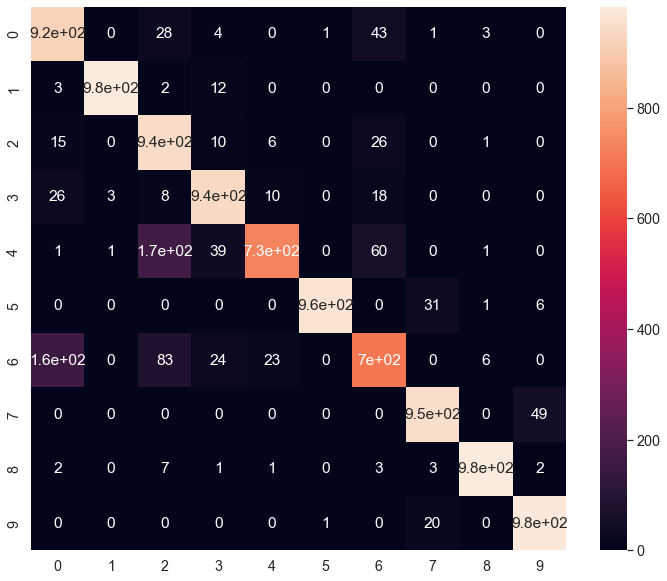

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_new, classes_x), annot=True)
plt.show()